---
title: "30 Day Map Challenge 2024 - Day 2: Lines"
categories:
  - Project
tags:
  - 30daymapchallenge
  - python
  - programming
classes: wide
header:
  teaser: /assets/images/30daymapchallenge2024-day2.png
---

The theme of the second day is _Lines_:
> A map with focus on lines. Roads, rivers, routes, or borders - this day is all about mapping connections and divisions. Another traditional way to keep things moving. 

### Data

Again, I will select data from the [Dresden OpenDataPortal](https://opendata.dresden.de) to visualize.
Specifically, I want to create a map of all standing and flowing waters in the city of Dresden.
The most prominent one here is the Elbe, a major river in Europe, which flows from east to west and divides the city in two parts.
_Obviously, the northern part of the city is the better one!_
The Elbe's source lays in the Giant Mountains of the northern Czech Republic.
After 1094 km, it flows into the North Sea at Cuxhaven (northwest of Hamburg). 

For today's visualization, I downloaded five datasets. While the first three serve the main purpose of mapping standing and flowing waters, the latter two will provide some background information that improve orientation.
- [Flowing Waters](https://opendata.dresden.de/informationsportal/?open=1&result=EE59E39313ED411E9BF89CAA3FDE6BEB#app/mainpage)
- [Standig Waters](https://opendata.dresden.de/informationsportal/?open=1&result=58D32A59645743DBAE49FA6BD336EEE0#app/mainpage)
- [Elbe](https://opendata.dresden.de/informationsportal/?open=1&result=2EB3436D339C443980597EEBFA1D9064#app/mainpage)
- [City Boundary](https://opendata.dresden.de/informationsportal/?open=1&result=F53704F6916F48EBAFA4CB223E7E47B8#app/mainpage)
- [Public Traffic Ways](https://opendata.dresden.de/informationsportal/?open=1&result=6D4BA7781F4849A3A99F9310170E36EE#app/mainpage)

## Implementation

First, we need of course to import required libraries and load the data for today.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

Since we need to load several CSV files today, I first create a method that performs file reading and transformation into a `GeoDataFrame` in one go.
This way, we can easily call the method on different files, which makes loading data much more convenient.
Later on, I will copy this method into its own file, so I can import and reuse it on other days again.

In [2]:
def read_dresden_csv(file_path: str | Path, geometry_column: str, srid: int=4326) -> gpd.GeoDataFrame:
    df = pd.read_csv(file_path, delimiter=";", header=0)
    df[geometry_column] = gpd.GeoSeries.from_wkt(
                df[geometry_column].str.removeprefix(f"SRID={srid};")
            )
    return gpd.GeoDataFrame(
        df,
        geometry=geometry_column,
        crs=f"EPSG:{srid}",
    )

Now, we can load today's data sets:

In [3]:
gdf_rivers = read_dresden_csv("data/dresden/fliessgewaesser.csv", geometry_column="shape")
gdf_elbe = read_dresden_csv("data/dresden/elbe-stehende-gewaesser.csv", geometry_column="shape")
gdf_standing = read_dresden_csv("data/dresden/stehende-gewaesser.csv", geometry_column="shape")

gdf_city_boundary = read_dresden_csv("data/dresden/city_boundary.csv", geometry_column="shape")
gdf_streets = read_dresden_csv("data/dresden/verkehrswege.csv", geometry_column="shape")

Today, I will create a static, non-interactive plot:

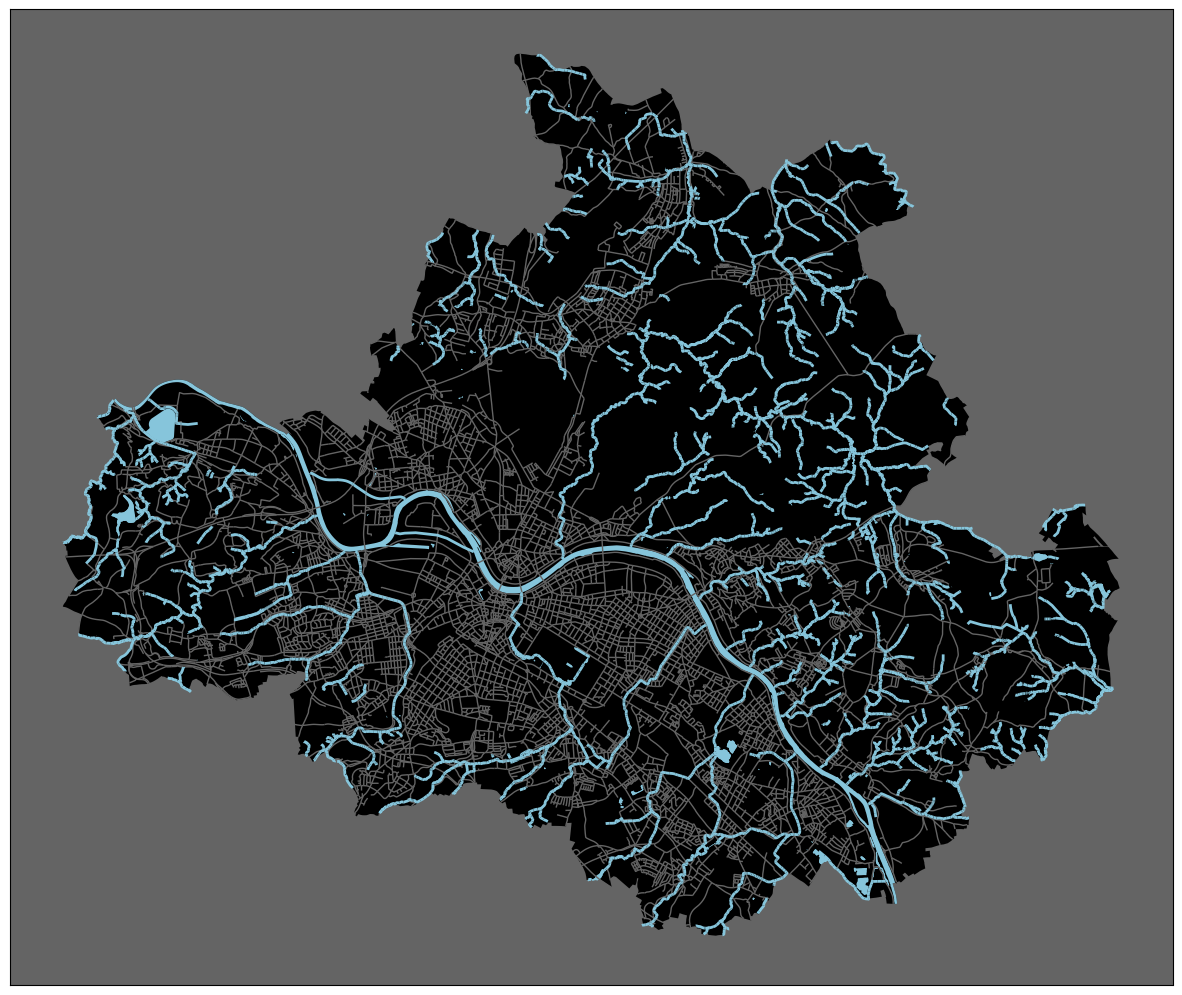

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

background_color = "#646464"
water_color = "#86c5db"

ax.set_facecolor(background_color)

gdf_city_boundary["shape"].plot(color="black", ax=ax)
gdf_streets["shape"].plot(color=background_color, ax=ax, linewidth=1)

gdf_rivers["shape"].plot(ax=ax, color=water_color, linewidth=2)
gdf_elbe["shape"].plot(ax=ax, color=water_color)
gdf_standing["shape"].plot(ax=ax, color=water_color)

plt.xticks([])
plt.yticks([])

plt.show()